/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

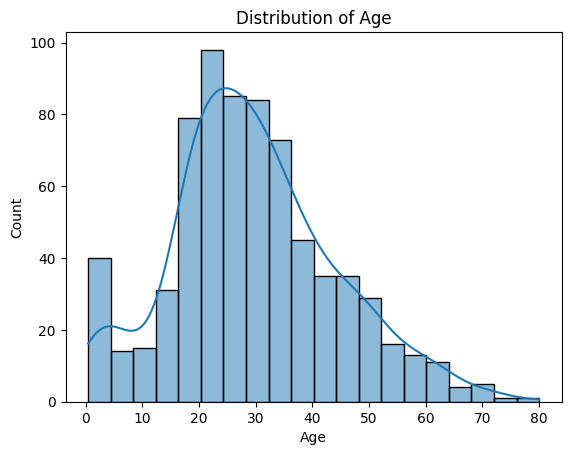

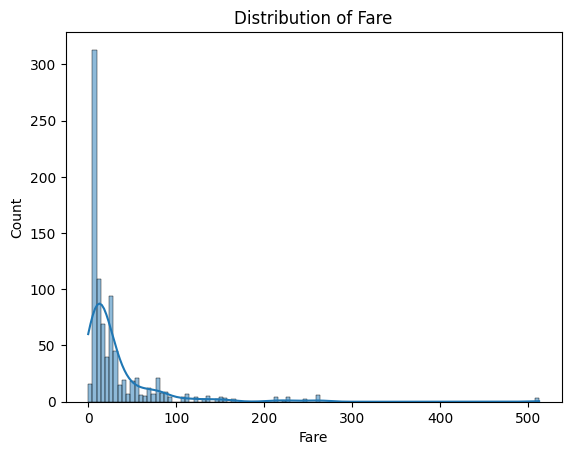

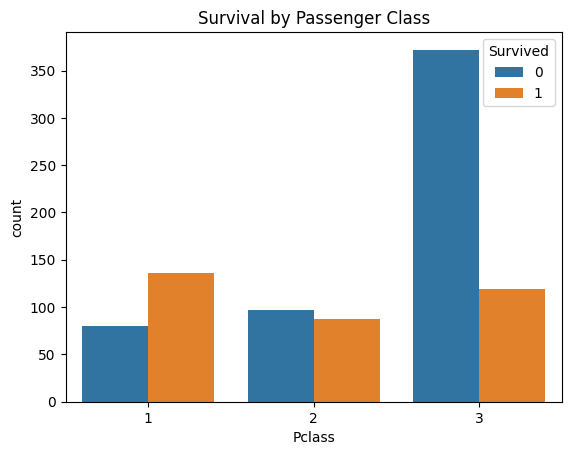

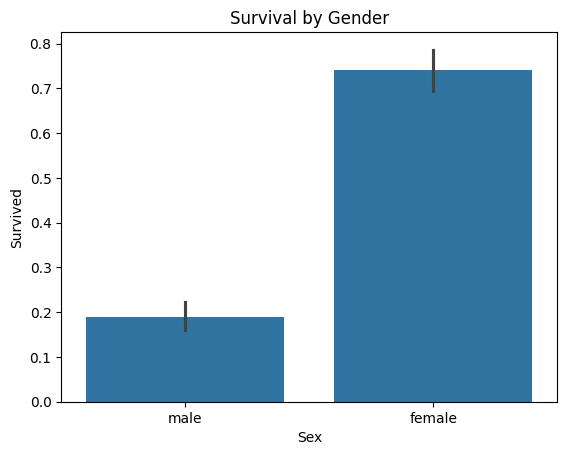

<ipython-input-1-de860df1cae9>:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-1-de860df1cae9>:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:04:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import xgboost as xgb

# Load the Titanic dataset
# Adjust the file path to your dataset
df = pd.read_csv('/content/Titanic_train.csv')

# Step 1: Exploratory Data Analysis (EDA)
# Check the structure of the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize distributions of numerical features
numerical_columns = ['Age', 'Fare']
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Visualize relationships between features and survival
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

sns.barplot(data=df, x='Sex', y='Survived')
plt.title("Survival by Gender")
plt.show()

# Step 2: Data Preprocessing
# Impute missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Encode categorical variables
categorical_columns = ['Sex', 'Embarked']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Split the dataset into features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: LightGBM Model
# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict and evaluate LightGBM
y_pred_lgb = lgb_model.predict(X_test)
print("\nLightGBM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1-Score:", f1_score(y_test, y_pred_lgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lgb))

# Step 4: XGBoost Model
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict and evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))

# Step 5: Hyperparameter Tuning for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
print("\nBest Parameters for XGBoost:", grid_search_xgb.best_params_)

# Evaluate tuned XGBoost
y_pred_best_xgb = best_xgb.predict(X_test)
print("\nTuned XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Precision:", precision_score(y_test, y_pred_best_xgb))
print("Recall:", recall_score(y_test, y_pred_best_xgb))
print("F1-Score:", f1_score(y_test, y_pred_best_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_best_xgb))

# Step 6: Comparative Analysis
# Visualize performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
lgb_scores = [
    accuracy_score(y_test, y_pred_lgb),
    precision_score(y_test, y_pred_lgb),
    recall_score(y_test, y_pred_lgb),
    f1_score(y_test, y_pred_lgb),
    roc_auc_score(y_test, y_pred_lgb)
]
xgb_scores = [
    accuracy_score(y_test, y_pred_best_xgb),
    precision_score(y_test, y_pred_best_xgb),
    recall_score(y_test, y_pred_best_xgb),
    f1_score(y_test, y_pred_best_xgb),
    roc_auc_score(y_test, y_pred_best_xgb)
]

# Create a DataFrame for visualization
comparison_df = pd.DataFrame({'Metric': metrics, 'LightGBM': lgb_scores, 'XGBoost': xgb_scores})
comparison_df.set_index('Metric', inplace=True)

# Plot the comparison
comparison_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title("Performance Comparison: LightGBM vs. XGBoost")
plt.ylabel("Score")
plt.show()

# Step 7: Summary Report
print("\nSummary:")
print("LightGBM vs. XGBoost Performance Comparison:")
print(comparison_df)
